# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness.

The data is trying to analyse which country has higher happiness or life satisfaction and which of them have Dystopia, It means
where life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, 
most corruption, least freedom and least social support.

Other attributes provided in the dataset, gives us insights and we will see the effect of each of these attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Features Explanation

Happiness Rank: Rank of any country in a particular year.

Country: Name of the country.

Standard Error: The standard error of the happiness score.

Happiness Score: Happiness score as the sum of all numerical columns in the datasets.

Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.

Trust: A quantification of the people’s perceived trust in their governments.

Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Generosity: Numerical value estimated based on the perception of Generosity experienced by poll takers in their country

Family Support: Metric estimating satisfaction of people with their friends and family.

Freedom: Perception of freedom quantified.

Dystopia: Hypothetically the saddest country in the world.

Lower Confidence Interval: Lower Confidence Interval of the Happiness Score.

Upper Confidence Interval: Upper Confidence Interval of the Happiness Score.

In [5]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [6]:
df.shape

(158, 12)

Dataframe has 158 rows and 12 columns.

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

All the columns have numerical data except for Country and Region column.

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Dataset has no missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The info function shows us the column names and the data types. There are 2 columns with object data type, 1 column with integer data type and remaining columns as float data type.

In [10]:
#Describing the dataframe
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
numeric_features=['Happiness Score','Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
print(len(numeric_features))

9


# Visualization of the dataset

Univariate Analysis

Text(0.5, 1.0, 'Region')

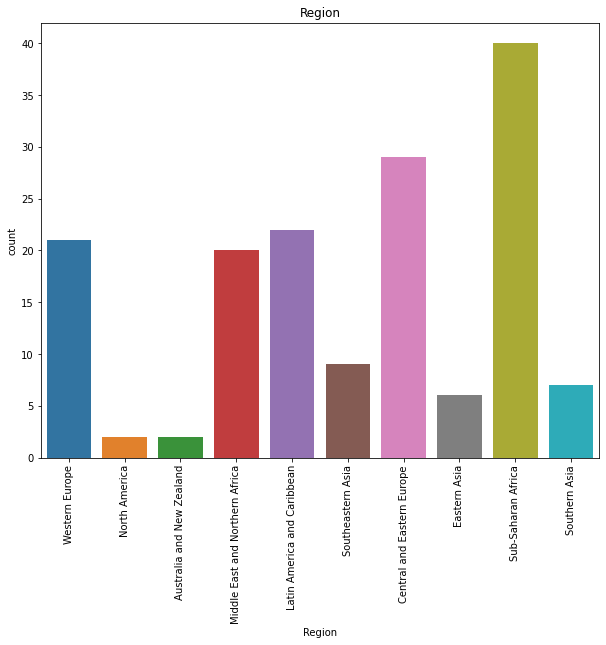

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(df['Region'])
plt.xticks(rotation = 90)
plt.title('Region')

Bivariate Analysis

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

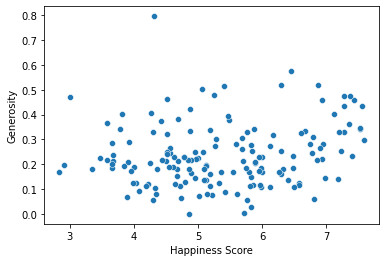

In [13]:
sns.scatterplot(x='Happiness Score',y='Generosity',data=df)

 In the above scatterplot we find no correlation(very less co-related) between Generosity and Happiness Score.

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

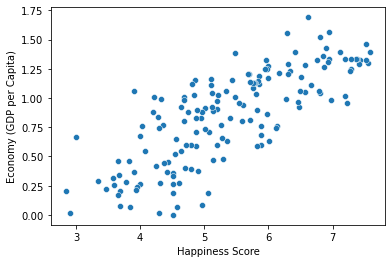

In [14]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

The above scatter plot shows that there is a positive correlation between Happiness Score and Economy (GDP per Capita) i.e. as the Economy of a country increases, Happiness score of that country also increases.

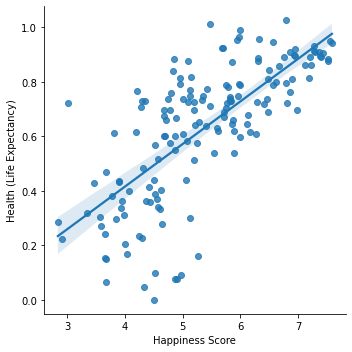

In [15]:
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

There is a positive correlation between Health of people and Happiness Score but outliers are also present.

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

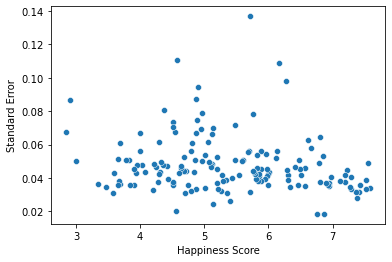

In [16]:
sns.scatterplot(x='Happiness Score',y='Standard Error',data=df)

Above plot shows the negative correlation between Happiness score and standard Error.

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

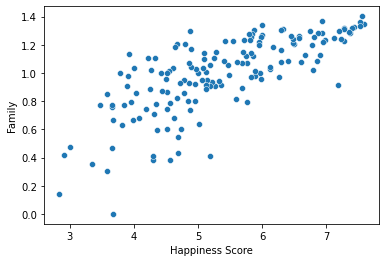

In [17]:
sns.scatterplot(x='Happiness Score',y='Family',data=df)

There is a positive correlation between family and Happiness Score.

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

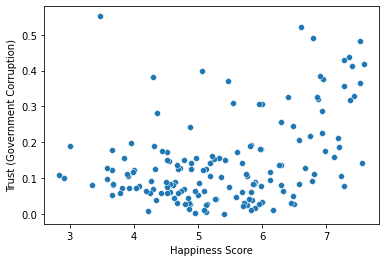

In [18]:
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)',data=df)

Above plot shows not a good correlation between Happiness score and Trust.

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

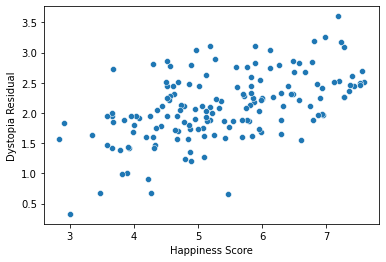

In [19]:
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',data=df)

There is a positive correlation between Dystopia Residual and Happiness Score but outliers are also present.

<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>

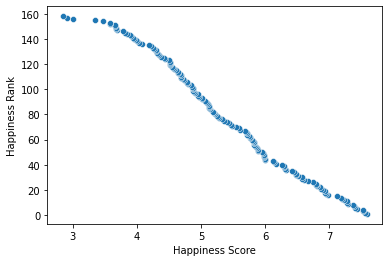

In [20]:
sns.scatterplot(x='Happiness Score',y='Happiness Rank',data=df)

There is a negative correlation between Happiness Score and Happiness Rank.

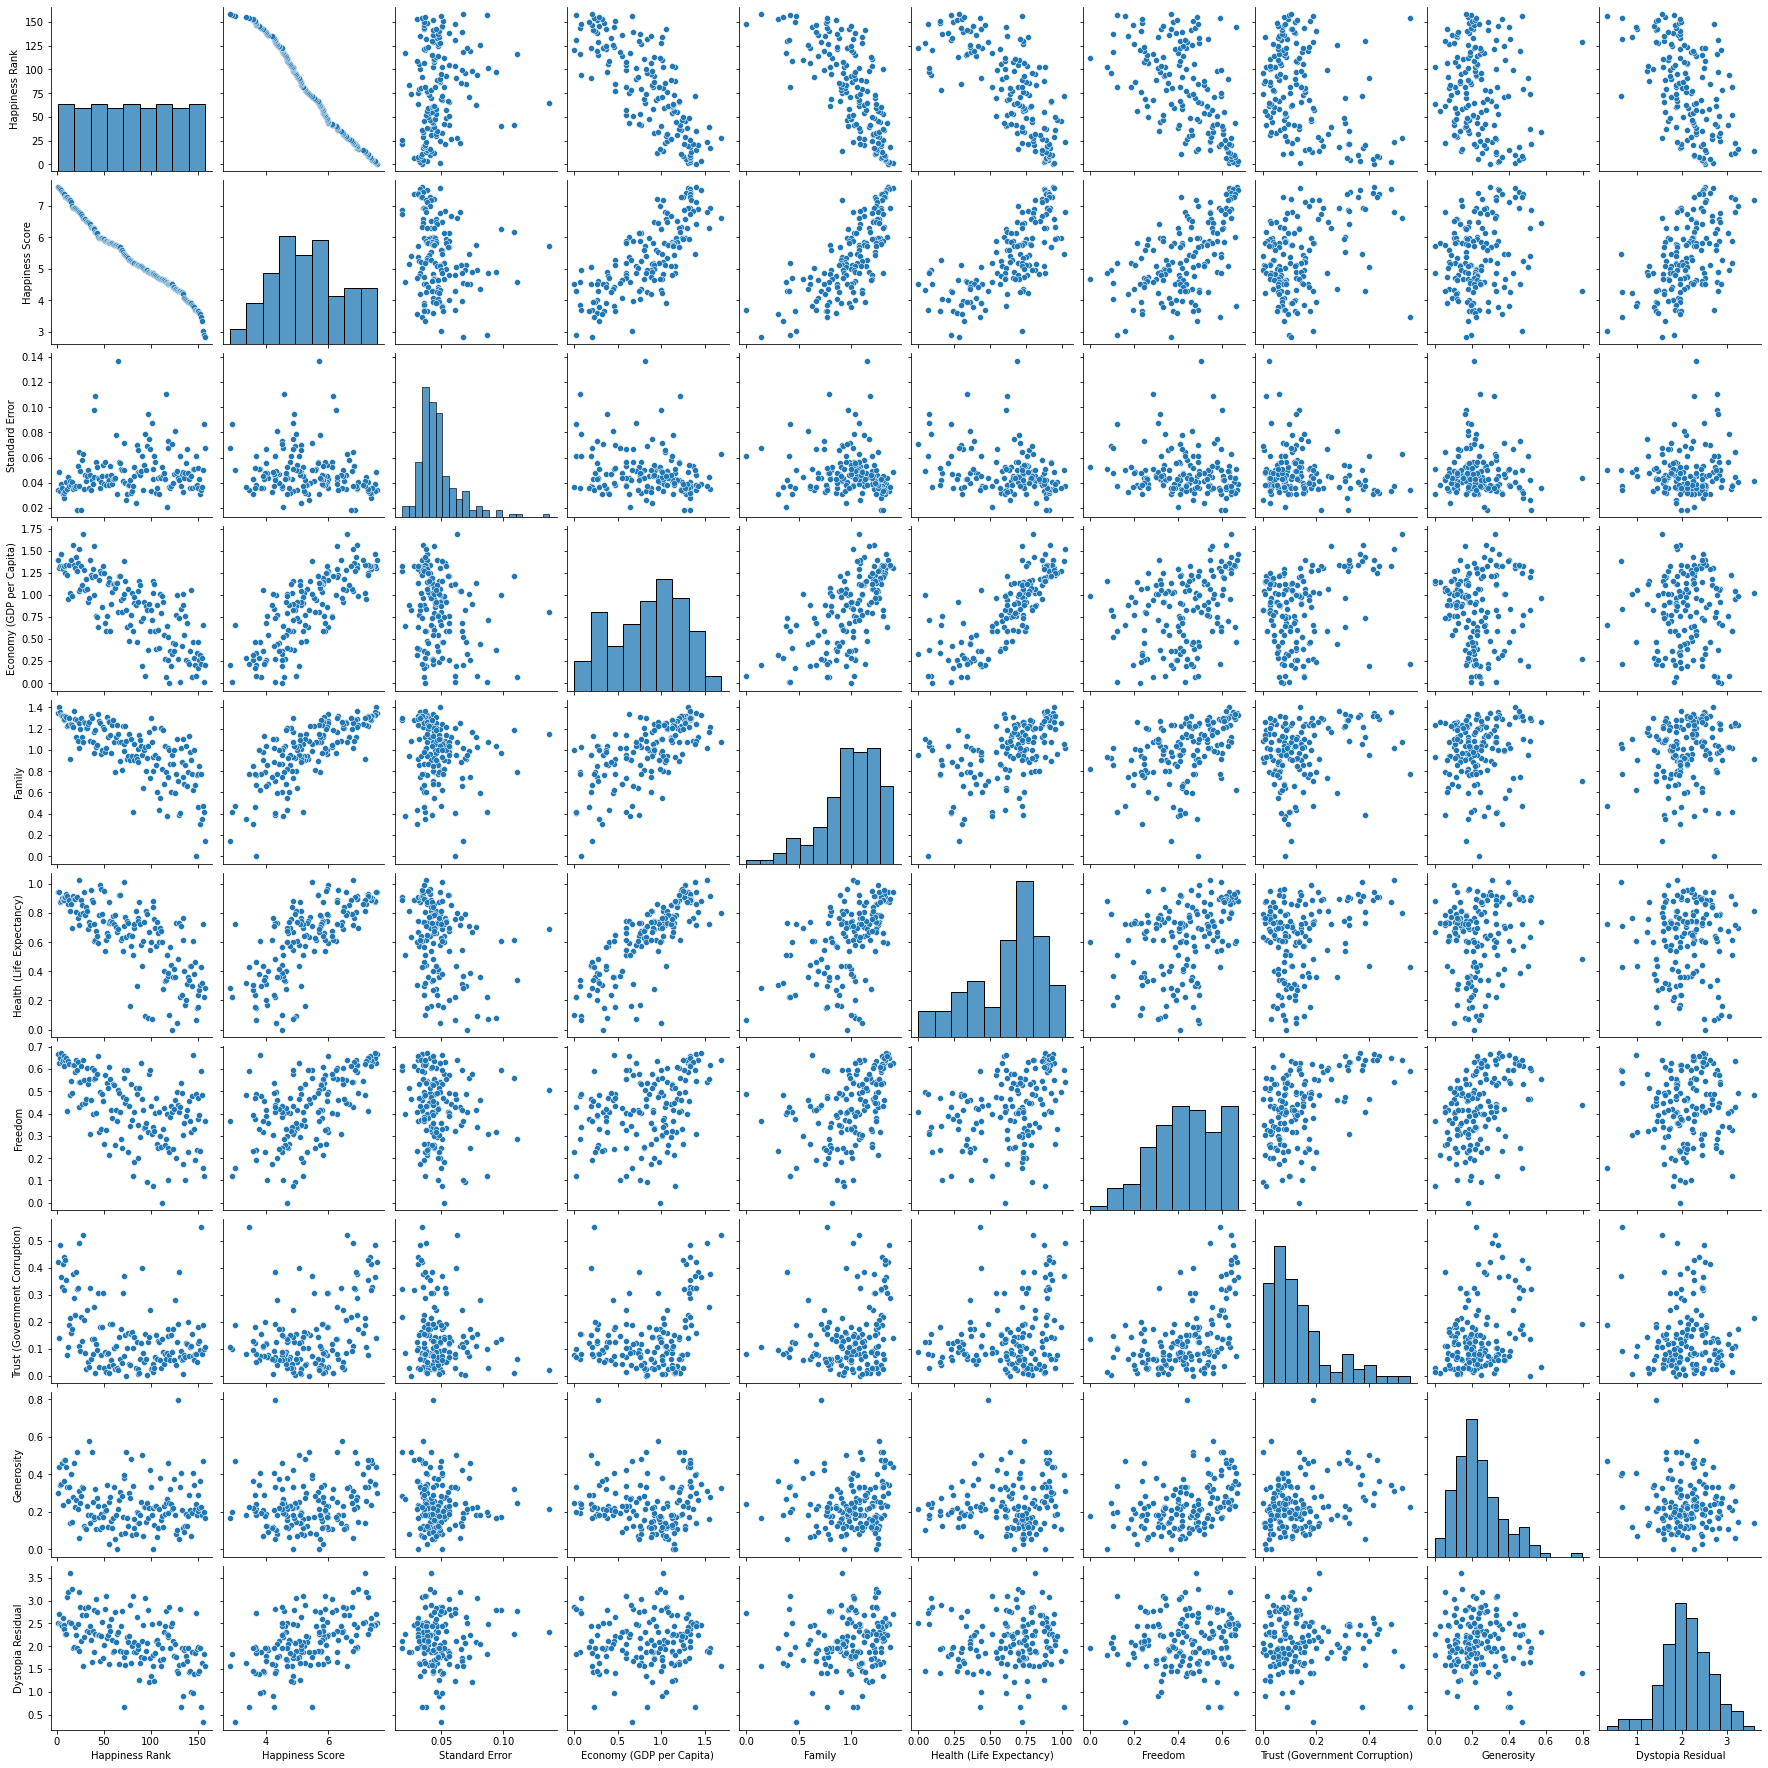

In [21]:
sns.pairplot(df)

Above Pairplot show that our target feature(Happiness Score) shows positive linear correlation with almost all features except for a few which show no correlation and a negative correlation with happiness rank.

# Correlation

In [22]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

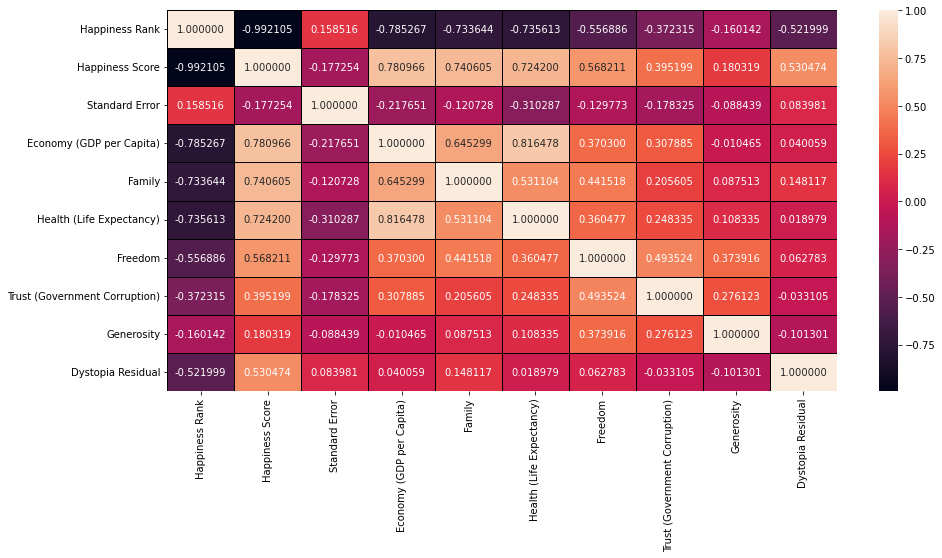

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot = True, linewidths=0.5, linecolor="black", fmt= '2f')

Happiness Score shows a strong correlation between Economy,Family,Health,Freedom and Dystopia while a negative correlation with Happiness Rank.

# Outliers checking

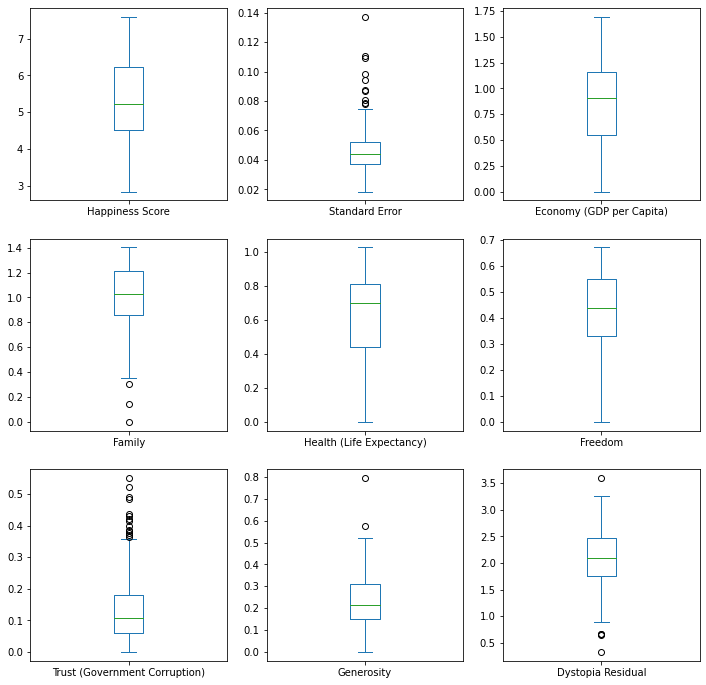

In [24]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="box",ax=ax[row,col])
    col += 1

From above boxplots we can conclude that there are outliers in Standard Error and Trust (Government Corruption) feature whereas very few in Generosity, Family and Dystopia Residual features.

# Skewness

In [25]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

standard Error,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity show skewness, which needs to transform data to remove skewness.

# Normal Distribution curve

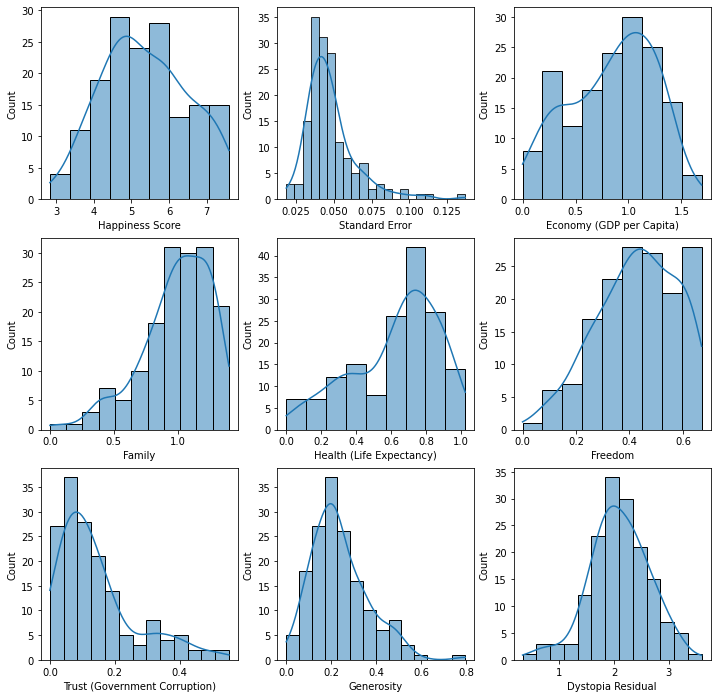

In [26]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df[i],kde=True,ax=ax[row,col])
    col += 1

From above histograms, we can conclude that Dytopia Residual feature is normally distributed and others are little bit right skewed or left skewed.

# Data Cleaning

In [27]:
df=df.drop(columns=['Country','Region','Happiness Rank'],axis=1)

In [28]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In Data Cleaning , we dropped 'Country','Region'and 'Happiness Rank' columns. So the numbers of columns decreased from 12 to 9.

# Removing outliers

Acceptable range for skewness is +/-0.5 The feature columns that have skewness are Standard Error, Freedom, Generosity and Dystopia Residual. 

z-score Techniques

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(158, 9)

In [30]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [31]:
df=df[(z<3).all(axis=1)]
print(df.shape)

(149, 9)


The Z Score techniques removed all the outliers from the data set.

In [32]:
#percentage of data loss
loss_percent=(158-149)/158*100
print(loss_percent)

5.69620253164557


So here we lost 5.7% of data which is minimum loss.

# Splitting the dataset

In [33]:
X = df.drop('Happiness Score', axis=1) # List of all features
Y =df['Happiness Score'] # Data of our label

In [34]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [35]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

# Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [37]:
X_scaled # Displayed the feature values after applying StandardScaler.

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


By using StandardScaler we scaled the Indepenent variables(X).

# Training and Testing data sets

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

# Machine Learning Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model Selection

linear_model = LinearRegression()
svr_model = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')

rfr_model = RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

In [40]:
# Training the models

linear_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)

rfr_model.fit(X_train, Y_train)
knr_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [41]:
# Predictions

pred_linear = linear_model.predict(X_test)
pred_svr = svr_model.predict(X_test)

pred_rfr = rfr_model.predict(X_test)
pred_knr = knr_model.predict(X_test)

# Evaluation metrics

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [43]:
# RMSE - a lower RMSE is better than a higher one

mse_linear = mean_squared_error(Y_test, pred_linear)
mse_svr = mean_squared_error(Y_test, pred_svr)

mse_rfr = mean_squared_error(Y_test, pred_rfr)
mse_knr = mean_squared_error(Y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)

rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)

print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.0002700138784157562
RMSE of Support Vector Regression is:  0.4393128980074327
RMSE of Random Forest Regressor is:  0.6175199034073896
RMSE of K Neighbors Regressor is:  0.39327838506316964


In [44]:
# R2 Score for the models

print(f"R2 Score for Linear Regression is: ", r2_score(Y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(Y_test, pred_svr, multioutput='variance_weighted')*100)

print(f"R2 Score for Random Forest Regressor is: ", r2_score(Y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(Y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  99.99999359577565
R2 Score for Support Vector Regression is:  83.04716751246471
R2 Score for Random Forest Regressor is:  66.50374281092424
R2 Score for K Neighbors Regressor is:  86.41390903110218


# LinearRegression

In [45]:
lm=LinearRegression()

In [46]:
lm.fit(X_train,Y_train)

LinearRegression()

In [47]:
Y_pred=lm.predict(X_train)

In [48]:
Ypred=lm.predict(X_test)

In [49]:
lm.score(X_train,Y_train)

0.9999999367269394

In [50]:
lm.score(X_test,Y_test)

0.9999999359577566

In [51]:
print('R2 score:',r2_score(Ypred,Y_test))

R2 score: 0.9999999359493144


In [52]:
print('R2 score:',r2_score(Y_pred,Y_train))

R2 score: 0.9999999367269354


In [53]:
mean_squared_error(Y_test,Ypred)

7.290749453711878e-08

In [54]:
print(np.sqrt(mean_squared_error(Y_test,Ypred)))

0.0002700138784157562


In [57]:
lm.coef_

array([-8.86639474e-06,  3.86730500e-01,  2.51024437e-01,  2.45057963e-01,
        1.50308805e-01,  1.12996255e-01,  1.19500035e-01,  5.23883679e-01])

In [58]:
residual=Y_test-Ypred

In [59]:
residual

76    -0.000328
18    -0.000319
121   -0.000289
81    -0.000301
79     0.000024
32     0.000270
67     0.000370
145    0.000160
71     0.000179
85    -0.000186
112   -0.000342
12     0.000212
37    -0.000148
9      0.000038
19    -0.000331
58     0.000483
141    0.000211
72     0.000420
57    -0.000100
136   -0.000087
30    -0.000048
127   -0.000161
26     0.000358
132   -0.000030
133   -0.000526
150   -0.000132
113   -0.000492
104    0.000072
47    -0.000198
31    -0.000083
22    -0.000164
15     0.000474
68     0.000373
11     0.000360
44    -0.000085
108    0.000007
53    -0.000211
28    -0.000025
Name: Happiness Score, dtype: float64

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

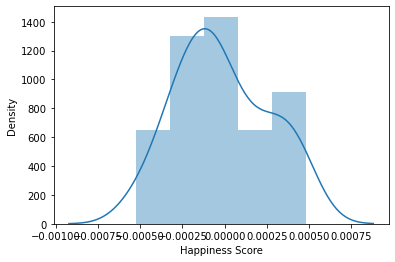

In [60]:
sns.distplot(residual)

Above dist plot shows Normaly Distributed plot of residual.

Text(0, 0.5, 'predicted val')

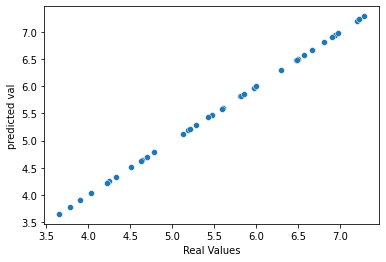

In [61]:
sns.scatterplot(Ypred,Y_test)
plt.xlabel("Real Values")
plt.ylabel("predicted val")

Real Values and Predicted values are highly correlated.

# Saving the model

In [62]:
import joblib
joblib.dump(linear_model,'world Happiness.pkl')

['world Happiness.pkl']